# Mobility reports

Source: https://www.google.com/covid19/mobility/

Overview: https://support.google.com/covid19-mobility/answer/9824897?hl=en&ref_topic=9822927 

## Understanding the data

This dataset is intended to help remediate the impact of COVID-19. It shouldn’t be used for medical diagnostic, prognostic, or treatment purposes. It also isn’t intended to be used for guidance on personal travel plans.The data shows how visits to places, such as grocery stores and parks, are changing in each geographic region. 

Changes for each day are compared to a baseline value for that day of the week:

* The baseline is the median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020.
* The datasets show trends over several months with the most recent data representing approximately 2-3 days ago—this is how long it takes to produce the datasets.

> One question
>
>
>In Long-term analysis
As time passes and we move further away from the baseline period, populations might vary due to relocation or new regional and remote working options. Google’s understanding of categorized places might also change. For example, the same value today and in April 2020 might not indicate the same behavior or adherence—it might be that Google has updated information about shops and restaurants in the region or that fewer people live there now. These differences could shift the values up or down over long time periods, so we recommend using some caution when analyzing data from longer time intervals (6+ months).

## Precessing 

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### read the data

In [192]:
df = pd.read_csv('2021_US_Region_Mobility_Report.csv', index_col=0)
df.head()

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,,,,,,,,,
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-01,-47.0,-37.0,-21.0,-62.0,-75.0,27.0
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-02,-26.0,-13.0,-14.0,-33.0,-21.0,9.0
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-03,-27.0,-16.0,-24.0,-33.0,-17.0,7.0
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-04,-19.0,-8.0,-23.0,-39.0,-34.0,12.0
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-05,-20.0,-6.0,-20.0,-39.0,-34.0,12.0


In [193]:
df.shape

(951960, 14)

In [194]:
df.columns

Index(['country_region', 'sub_region_1', 'sub_region_2', 'metro_area',
       'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [195]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,,,,,,,,,
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-01,-47.0,-37.0,-21.0,-62.0,-75.0,27.0
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-02,-26.0,-13.0,-14.0,-33.0,-21.0,9.0
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-03,-27.0,-16.0,-24.0,-33.0,-17.0,7.0
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-04,-19.0,-8.0,-23.0,-39.0,-34.0,12.0
US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-05,-20.0,-6.0,-20.0,-39.0,-34.0,12.0


### filter data with NA value

In [196]:
df = df.dropna(subset=['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'])

In [197]:
df.shape
# great portion of data has missing values

(191450, 14)

### consider data in country side

In [198]:
country_df = df[df['sub_region_1'].isnull()]
country_df.shape 

(365, 14)

In the country side, the data is complete, with no NA data.

### consider data in state wide

In [199]:
state_df = df.dropna(subset=['sub_region_1'])

In [273]:
state_df = state_df[state_df['sub_region_2'].isnull()]
state_df = state_df[state_df['census_fips_code'].isnull()]
state_df.head()

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-01,-44.0,-30.0,-16.0,-46.0,-72.0,26.0
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-02,-19.0,-8.0,-2.0,-8.0,-19.0,7.0
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-03,-16.0,-8.0,-7.0,-1.0,-17.0,6.0
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-04,-5.0,2.0,-9.0,-9.0,-26.0,8.0
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-05,-10.0,-1.0,-14.0,-12.0,-25.0,8.0


In [297]:
state_summary = state_df.groupby('sub_region_1').count()
state_summary.head()

,country_region,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,,,,,,,,
Alabama,365,0,0,365,0,365,365,365,365,365,365,365,365
Alaska,365,0,0,365,0,365,365,365,365,365,365,365,365
Arizona,365,0,0,365,0,365,365,365,365,365,365,365,365
Arkansas,365,0,0,365,0,365,365,365,365,365,365,365,365
California,365,0,0,365,0,365,365,365,365,365,365,365,365


In [275]:
state_summary.shape

(50, 13)

Consider there are 50 states in US:
* there is one extra state: District of Columbia
* There are missing data in Delaware state.

### consider county wide

each region has specfic place id, we can see if the data we obtained are in complete shape

In [203]:
county_df = df.dropna(subset=['sub_region_1',"sub_region_2"])
county_df.shape

(172522, 14)

In [204]:
county_df.groupby(['sub_region_1','place_id']).count()['date']

sub_region_1  place_id                   
Alabama       ChIJ-YHUsJSBjogRwWSetWNBBsQ    365
              ChIJ80bNgkhOiIgR2OiZAIYFOOI    231
              ChIJATNm2KgQiogR8kdQnflzDDQ     13
              ChIJD42VzuAUYogRzlLGpknYs44    365
              ChIJI3NHUAHeiIgRjEYySwpu1Zg    261
                                            ... 
Wisconsin     ChIJh5LbcRnCA4gR3RL3bH7nZhU    171
              ChIJn6atQBr4BIgRWBJrJVzjgwU      2
              ChIJn_qhzUnMGogRPqGaYXA4zLA    365
Wyoming       ChIJ6ZENbZKQYIcR1BVum_c3z9s    303
              ChIJo4qjvDwfb4cRK9sJJHFmsQU    330
Name: date, Length: 673, dtype: int64

In [205]:
# filter out the county with NA exists
county_with_na = county_df.groupby('place_id').count()['date']!=365
county_df.groupby('place_id').count()[county_with_na]

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
place_id,,,,,,,,,,,,,
ChIJ-TfZvkTnx4kRgIG5NP-f8_4,288,288,288,0,0,288,288,288,288,288,288,288,288
ChIJ-V-yPH7H3ogRstggZi-Szls,364,364,364,0,0,364,364,364,364,364,364,364,364
ChIJ-WDLw6lhJYcRcrSQ4ttk6sE,313,313,313,0,0,313,313,313,313,313,313,313,313
ChIJ-dGew1EYQocRZA3rearTJXE,34,34,34,0,0,34,34,34,34,34,34,34,34
ChIJ-eQJ7XVdrIkR9B3mYwaGaI0,74,74,74,0,0,74,74,74,74,74,74,74,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChIJyXPVhcVrWIgR0qZwGD4Fq_c,323,323,323,0,0,323,323,323,323,323,323,323,323
ChIJz43VOa4q74gRooJQfmjTCl8,19,19,19,0,0,19,19,19,19,19,19,19,19
ChIJz5oX25XKqokRdZPkg_gyOOM,13,13,13,0,0,13,13,13,13,13,13,13,13


By observing of dataset of place_id "ChIJ-V-yPH7H3ogRstggZi-Szls", I found it's hard to find trend to fill the gap since we obseve no patterns for consecutive days.

In [206]:
# filter out the counties name with full information all year
county_without_na = county_df.groupby('place_id').count()['date']==365
county_complete = county_without_na[county_without_na.values==True]
county_complete

place_id
ChIJ-0CVcqRcKocRs7hv5vsqLVs    True
ChIJ-9Gb3wOJWYgRsNOCvn3hsr0    True
ChIJ-Xm73adITIYRhrb-NBX-zks    True
ChIJ-Y7t-qm02IcRW-C7IsrqOb4    True
ChIJ-YHUsJSBjogRwWSetWNBBsQ    True
                               ... 
ChIJycWfxDz1XIYRgQasSE1FyTI    True
ChIJye24g0OWw4kRa6osNwPLVyM    True
ChIJyxAXZg2va4cRgQv02X4ue50    True
ChIJzWww5uJfbIcRBvfuO6cAtKY    True
ChIJz_fVVFyS3IARB9bwj2HDpt4    True
Name: date, Length: 289, dtype: bool

In [207]:
# there are only 289 counties with all the information. 
county_rslt_df = county_df[county_df['place_id'].isin(county_complete.index)] 
county_rslt_df.groupby(['sub_region_1','place_id']).count()

country_region  sub_region_2  \
sub_region_1  place_id                                                    
Alabama       ChIJ-YHUsJSBjogRwWSetWNBBsQ             365           365   
              ChIJD42VzuAUYogRzlLGpknYs44             365           365   
              ChIJK6FDUmGym4gRO0XgJVIpkUY             365           365   
              ChIJMRERvxBnmogR0K_9O08dxDw             365           365   
              ChIJSfZjE7ooiIgRfGKcLi3wy24             365           365   
...                                                   ...           ...   
Washington    ChIJuW5y4XbKlVQR7A8AxglSPVI             365           365   
              ChIJybF97ueemlQRqURMGYrDDmc             365           365   
West Virginia ChIJNQedGRPUSIgRZaN_DqYadAE             365           365   
Wisconsin     ChIJR0uBFlj2BogRz09LOU-1Vyw             365           365   
              ChIJn_qhzUnMGogRPqGaYXA4zLA             365           365   

                                           metro_area  iso_3166_2_code  \
sub_region_1  place_id                                                   
Alabama       ChIJ-YHUsJSBjogRwWSetWNBBsQ           0                0   
              ChIJD42VzuAUYogRzlLGpknYs44           0                0   
              ChIJK6FDUmGym4gRO0XgJVIpkUY           0                0   
              ChIJMRERvxBnmogR0K_9O08dxDw           0                0   
              ChIJSfZjE7ooiIgRfGKcLi3wy24           0                0   
...                                               ...              ...   
Washington    ChIJuW5y4XbKlVQR7A8AxglSPVI           0                0   
              ChIJybF97ueemlQRqURMGYrDDmc           0                0   
West Virginia ChIJNQedGRPUSIgRZaN_DqYadAE           0                0   
Wisconsin     ChIJR0uBFlj2BogRz09LOU-1Vyw           0                0   
              ChIJn_qhzUnMGogRPqGaYXA4zLA           0                0   

                                           census_fips_code  date  \
sub_region_1  place_id                                              
Alabama       ChIJ-YHUsJSBjogRwWSetWNBBsQ               365   365   
              ChIJD42VzuAUYogRzlLGpknYs44               365   365   
              ChIJK6FDUmGym4gRO0XgJVIpkUY               365   365   
              ChIJMRERvxBnmogR0K_9O08dxDw               365   365   
              ChIJSfZjE7ooiIgRfGKcLi3wy24               365   365   
...                                                     ...   ...   
Washington    ChIJuW5y4XbKlVQR7A8AxglSPVI               365   365   
              ChIJybF97ueemlQRqURMGYrDDmc               365   365   
West Virginia ChIJNQedGRPUSIgRZaN_DqYadAE               365   365   
Wisconsin     ChIJR0uBFlj2BogRz09LOU-1Vyw               365   365   
              ChIJn_qhzUnMGogRPqGaYXA4zLA               365   365   

                                           retail_and_recreation_percent_change_from_baseline  \
sub_region_1  place_id                                                                          
Alabama       ChIJ-YHUsJSBjogRwWSetWNBBsQ                                                365    
              ChIJD42VzuAUYogRzlLGpknYs44                                                365    
              ChIJK6FDUmGym4gRO0XgJVIpkUY                                                365    
              ChIJMRERvxBnmogR0K_9O08dxDw                                                365    
              ChIJSfZjE7ooiIgRfGKcLi3wy24                                                365    
...                                                                                      ...    
Washington    ChIJuW5y4XbKlVQR7A8AxglSPVI                                                365    
              ChIJybF97ueemlQRqURMGYrDDmc                                                365    
West Virginia ChIJNQedGRPUSIgRZaN_DqYadAE                                                365    
Wisconsin     ChIJR0uBFlj2BogRz09LOU-1Vyw                                                365    
              ChIJn_qhzUnMGogRPqGaYXA4zLA 

In [208]:
county_summary = county_rslt_df.groupby('sub_region_1').count()
county_summary


,country_region,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,,,,,,,,
Alabama,1825,1825,0,0,1825,1825,1825,1825,1825,1825,1825,1825,1825
Arizona,3285,3285,0,0,3285,3285,3285,3285,3285,3285,3285,3285,3285
Arkansas,365,365,0,0,365,365,365,365,365,365,365,365,365
California,11680,11680,0,0,11680,11680,11680,11680,11680,11680,11680,11680,11680
Colorado,3650,3650,0,0,3650,3650,3650,3650,3650,3650,3650,3650,3650
Connecticut,1095,1095,0,0,1095,1095,1095,1095,1095,1095,1095,1095,1095
Delaware,365,365,0,0,365,365,365,365,365,365,365,365,365
Florida,10950,10950,0,0,10950,10950,10950,10950,10950,10950,10950,10950,10950
Georgia,4380,4380,0,0,4380,4380,4380,4380,4380,4380,4380,4380,4380


In [209]:
county_summary.shape

(42, 13)

There are nine states that I can't find single complete county-side data. Thus, I think it will be appropriate to study migrtion tables in state wide.

### graph on Alabama

In [210]:
state_df.head()

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-01,-44.0,-30.0,-16.0,-46.0,-72.0,26.0
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-02,-19.0,-8.0,-2.0,-8.0,-19.0,7.0
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-03,-16.0,-8.0,-7.0,-1.0,-17.0,6.0
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-04,-5.0,2.0,-9.0,-9.0,-26.0,8.0
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-05,-10.0,-1.0,-14.0,-12.0,-25.0,8.0


In [211]:
Alabama_state = state_df[state_df['sub_region_1']=='Alabama'][['date',
'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]

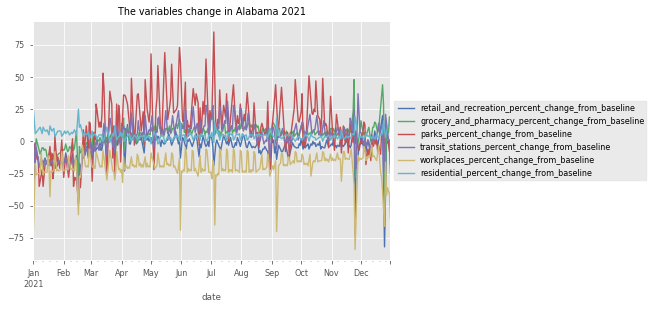

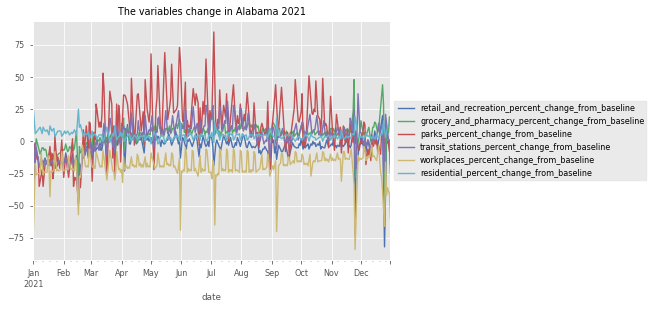

In [315]:
plt.style.use('seaborn-paper')
alabama_plot = Alabama_state.plot(x="date")
#plt.legend('',frameon=False)
plt.title("The variables change in Alabama 2021")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
alabama_plot.figure

<AxesSubplot:xlabel='date'>

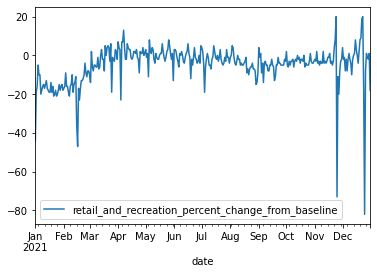

In [213]:
Alabama_state.plot(x="date", y='retail_and_recreation_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

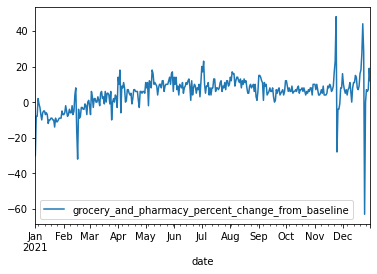

In [214]:
Alabama_state.plot(x="date", y='grocery_and_pharmacy_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

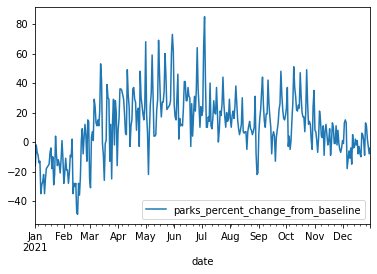

In [215]:
Alabama_state.plot(x="date", y='parks_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

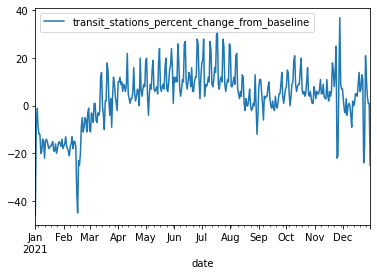

In [216]:
Alabama_state.plot(x="date", y='transit_stations_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

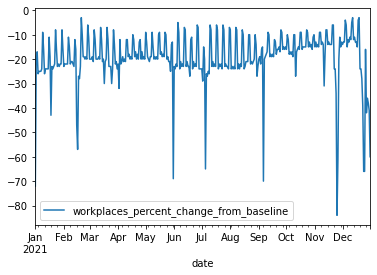

In [217]:
Alabama_state.plot(x="date", y='workplaces_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

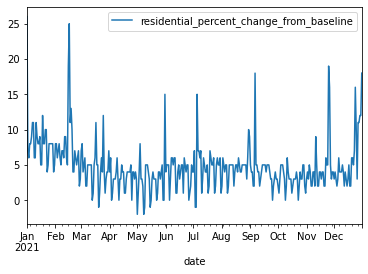

In [218]:
Alabama_state.plot(x="date", y='residential_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

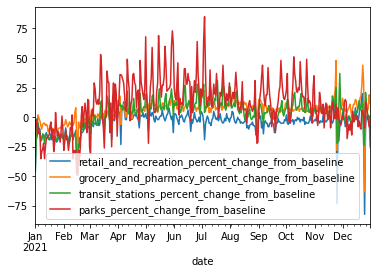

In [219]:
Alabama_state.plot(x="date", y=['retail_and_recreation_percent_change_from_baseline',
"grocery_and_pharmacy_percent_change_from_baseline",
'transit_stations_percent_change_from_baseline',
'parks_percent_change_from_baseline'])

<AxesSubplot:xlabel='date'>

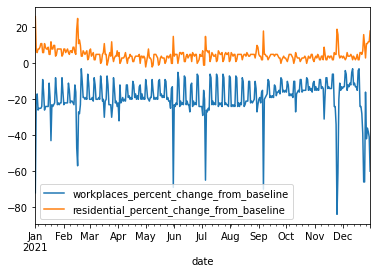

In [220]:
Alabama_state.plot(x="date", y=[
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline'])

### graph on Arizona

In [221]:
Arizona_state = state_df[state_df['sub_region_1']=='Arizona'][['date',
'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]

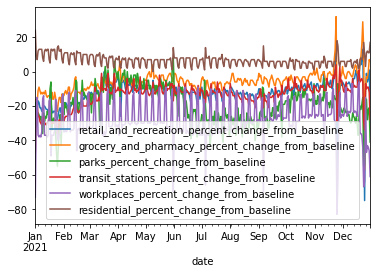

In [222]:
Arizona_plot = Arizona_state.plot(x="date")
#plt.legend('',frameon=False)

<AxesSubplot:xlabel='date'>

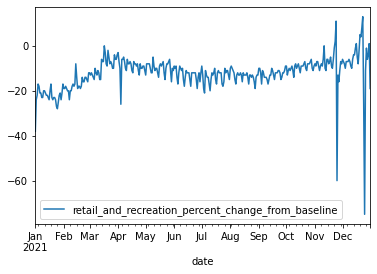

In [223]:
Arizona_state.plot(x="date", y='retail_and_recreation_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

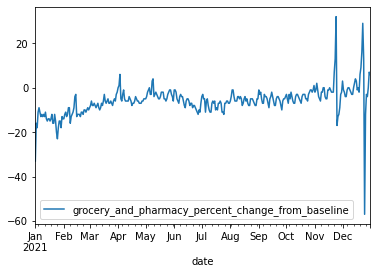

In [224]:
Arizona_state.plot(x="date", y='grocery_and_pharmacy_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

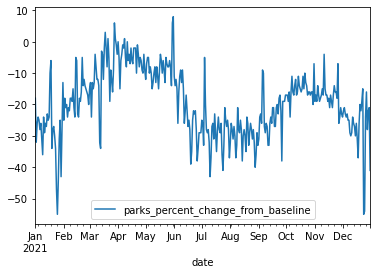

In [225]:
Arizona_state.plot(x="date", y='parks_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

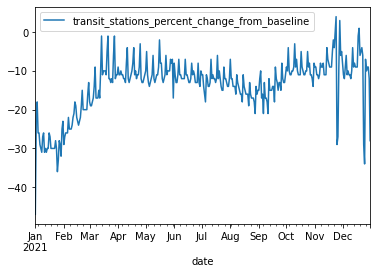

In [226]:
Arizona_state.plot(x="date", y='transit_stations_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

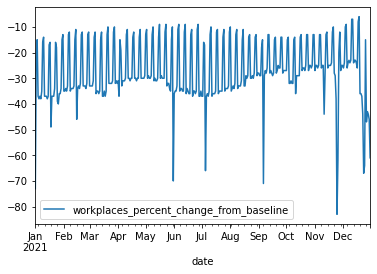

In [227]:
Arizona_state.plot(x="date", y='workplaces_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

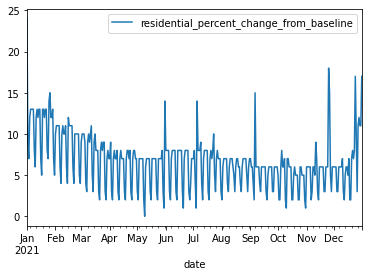

In [228]:
Arizona_state.plot(x="date", y='residential_percent_change_from_baseline')

<AxesSubplot:xlabel='date'>

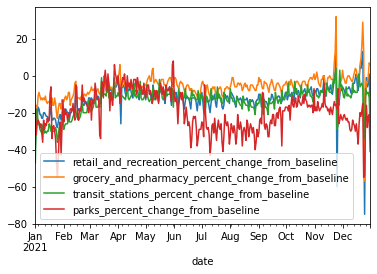

In [229]:
Arizona_state.plot(x="date", y=['retail_and_recreation_percent_change_from_baseline',
"grocery_and_pharmacy_percent_change_from_baseline",
'transit_stations_percent_change_from_baseline',
'parks_percent_change_from_baseline'])

<AxesSubplot:xlabel='date'>

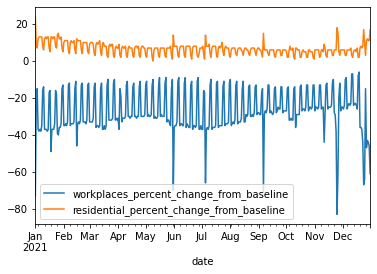

In [230]:
Arizona_state.plot(x="date", y=[
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline'])

It looks like they have some weekly pattern. Dig into this later.

## covid data

In [231]:
covid = pd.read_csv('us-states.csv', index_col=0)
covid = covid.reset_index()
covid.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


### covid combine with alabama

In [232]:
alabama_cases = covid[covid["state"]=="Alabama"]
cases = alabama_cases["cases"]
change = cases.diff()
change.shape

(868,)

In [233]:
alabama_cases.loc[:,"change"]=change
alabama_cases.head()

c:\Users\amber\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,date,state,fips,cases,deaths,change
586,2020-03-13,Alabama,1,6,0,NaN
637,2020-03-14,Alabama,1,12,0,6.0
689,2020-03-15,Alabama,1,23,0,11.0
742,2020-03-16,Alabama,1,29,0,6.0
795,2020-03-17,Alabama,1,39,0,10.0


In [234]:
require = (covid["date"] >"2021") & (covid["date"] <"2022")
alabama_covid=alabama_cases[require].sort_values("date")
alabama_covid.shape
alabama_covid.head()

c:\Users\amber\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,date,state,fips,cases,deaths,change
16734,2021-01-01,Alabama,1,365747,4872,4521.0
16789,2021-01-02,Alabama,1,369458,4872,3711.0
16844,2021-01-03,Alabama,1,371934,4873,2476.0
16899,2021-01-04,Alabama,1,374095,4878,2161.0
16954,2021-01-05,Alabama,1,379593,4886,5498.0


<AxesSubplot:xlabel='date'>

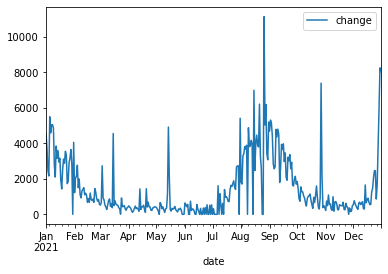

In [235]:
alabama_covid["date"] = pd.to_datetime(alabama_covid["date"])
alabama_covid.plot(x="date",y='change')

In [236]:
combine = alabama_covid.merge(Alabama_state, on="date")
combine.head()

,date,state,fips,cases,deaths,change,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-01,Alabama,1,365747,4872,4521.0,-44.0,-30.0,-16.0,-46.0,-72.0,26.0
1,2021-01-02,Alabama,1,369458,4872,3711.0,-19.0,-8.0,-2.0,-8.0,-19.0,7.0
2,2021-01-03,Alabama,1,371934,4873,2476.0,-16.0,-8.0,-7.0,-1.0,-17.0,6.0
3,2021-01-04,Alabama,1,374095,4878,2161.0,-5.0,2.0,-9.0,-9.0,-26.0,8.0
4,2021-01-05,Alabama,1,379593,4886,5498.0,-10.0,-1.0,-14.0,-12.0,-25.0,8.0


In [249]:
def plot2graph (lov):
# create figure and axis objects with subplots()
        fig,ax = plt.subplots()
        # make a plot
        ax.plot(combine.date,
                combine.change,
                color="red")
        # set x-axis label
        ax.set_xlabel("date")
        # set y-axis label
        ax.set_ylabel("cases")

        # twin object for two different y-axis on the sample plot
        ax2=ax.twinx()
        # make a plot with different y-axis using second axis object
        ax2.plot(combine.date, 
                combine[lov],
                color="blue")
        ax2.set_ylabel(lov)
        plt.show()



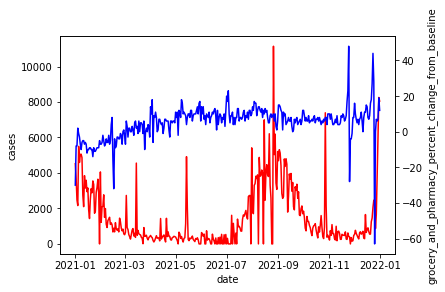

In [251]:
plot2graph ("grocery_and_pharmacy_percent_change_from_baseline")

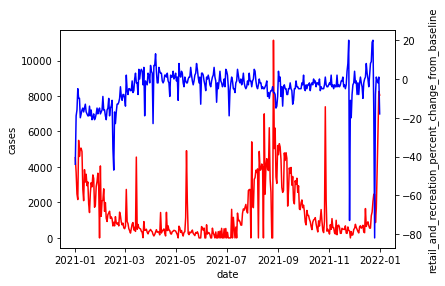

In [250]:
plot2graph('retail_and_recreation_percent_change_from_baseline')

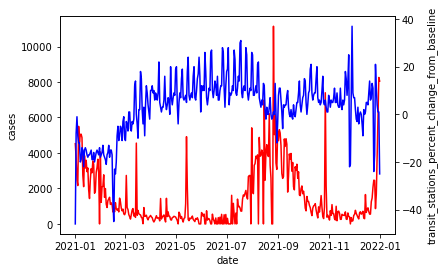

In [252]:
plot2graph ('transit_stations_percent_change_from_baseline')

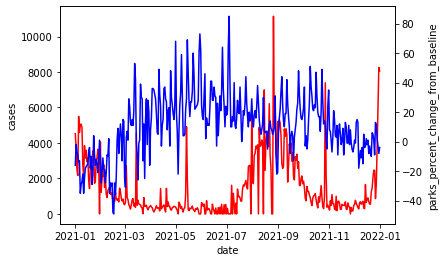

In [253]:
plot2graph ('parks_percent_change_from_baseline')

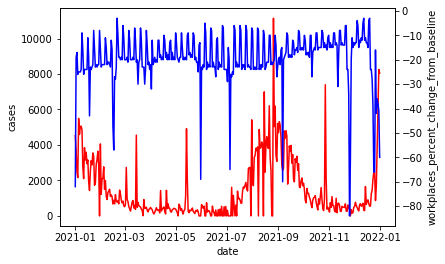

In [254]:
plot2graph ('workplaces_percent_change_from_baseline')

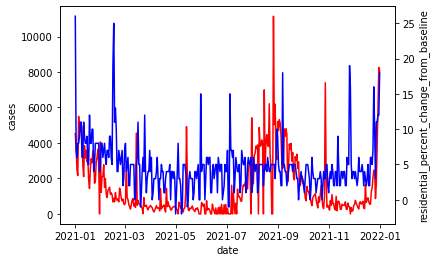

In [255]:
plot2graph ('residential_percent_change_from_baseline')

## map graph

### first day

In [276]:
first_da = state_df[state_df["date"]=="2021-01-01"]
first_da.head()

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-01,-44.0,-30.0,-16.0,-46.0,-72.0,26.0
US,United States,Alaska,NaN,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,2021-01-01,-46.0,-29.0,0.0,-59.0,-70.0,25.0
US,United States,Arizona,NaN,NaN,US-AZ,NaN,ChIJaxhMy-sIK4cRcc3Bf7EnOUI,2021-01-01,-38.0,-33.0,-18.0,-47.0,-73.0,24.0
US,United States,Arkansas,NaN,NaN,US-AR,NaN,ChIJYSc_dD-e0ocR0NLf_z5pBaQ,2021-01-01,-33.0,-27.0,0.0,-38.0,-70.0,23.0
US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-01-01,-52.0,-36.0,-11.0,-68.0,-78.0,28.0


In [277]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
#first_da = dict(map(reversed, us_state_to_abbrev.items()))

In [281]:
first_da['state_code']= first_da['sub_region_1'].map(us_state_to_abbrev)
first_da.head()

c:\Users\amber\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,state_code
country_region_code,,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-01,-44.0,-30.0,-16.0,-46.0,-72.0,26.0,AL
US,United States,Alaska,NaN,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,2021-01-01,-46.0,-29.0,0.0,-59.0,-70.0,25.0,AK
US,United States,Arizona,NaN,NaN,US-AZ,NaN,ChIJaxhMy-sIK4cRcc3Bf7EnOUI,2021-01-01,-38.0,-33.0,-18.0,-47.0,-73.0,24.0,AZ
US,United States,Arkansas,NaN,NaN,US-AR,NaN,ChIJYSc_dD-e0ocR0NLf_z5pBaQ,2021-01-01,-33.0,-27.0,0.0,-38.0,-70.0,23.0,AR
US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-01-01,-52.0,-36.0,-11.0,-68.0,-78.0,28.0,CA


In [335]:
first_da.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation'}, inplace = True)
first_da.head()

c:\Users\amber\anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,state_code
country_region_code,,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-01,-44.0,-30.0,-16.0,-46.0,-72.0,26.0,AL
US,United States,Alaska,NaN,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,2021-01-01,-46.0,-29.0,0.0,-59.0,-70.0,25.0,AK
US,United States,Arizona,NaN,NaN,US-AZ,NaN,ChIJaxhMy-sIK4cRcc3Bf7EnOUI,2021-01-01,-38.0,-33.0,-18.0,-47.0,-73.0,24.0,AZ
US,United States,Arkansas,NaN,NaN,US-AR,NaN,ChIJYSc_dD-e0ocR0NLf_z5pBaQ,2021-01-01,-33.0,-27.0,0.0,-38.0,-70.0,23.0,AR
US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-01-01,-52.0,-36.0,-11.0,-68.0,-78.0,28.0,CA


In [336]:
import plotly.express as px
fig = px.choropleth(first_da,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='retail_and_recreation',
                    color_continuous_scale="Viridis_r", 
                    title="The retail and recreation percent in first day 2021",
                    width=1000,
                    height=600
                    )

fig.show()

### last day

In [318]:
last_da = state_df[state_df["date"]=="2021-12-31"]
last_da.head()

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-12-31,-18.0,12.0,-4.0,-25.0,-60.0,18.0
US,United States,Alaska,NaN,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,2021-12-31,-12.0,3.0,21.0,-20.0,-58.0,15.0
US,United States,Arizona,NaN,NaN,US-AZ,NaN,ChIJaxhMy-sIK4cRcc3Bf7EnOUI,2021-12-31,-19.0,6.0,-41.0,-28.0,-61.0,17.0
US,United States,Arkansas,NaN,NaN,US-AR,NaN,ChIJYSc_dD-e0ocR0NLf_z5pBaQ,2021-12-31,-3.0,14.0,45.0,-9.0,-55.0,14.0
US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-12-31,-23.0,7.0,-20.0,-49.0,-66.0,18.0


In [320]:
last_da['state_code']= last_da['sub_region_1'].map(us_state_to_abbrev)
last_da.head()

c:\Users\amber\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,state_code
country_region_code,,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-12-31,-18.0,12.0,-4.0,-25.0,-60.0,18.0,AL
US,United States,Alaska,NaN,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,2021-12-31,-12.0,3.0,21.0,-20.0,-58.0,15.0,AK
US,United States,Arizona,NaN,NaN,US-AZ,NaN,ChIJaxhMy-sIK4cRcc3Bf7EnOUI,2021-12-31,-19.0,6.0,-41.0,-28.0,-61.0,17.0,AZ
US,United States,Arkansas,NaN,NaN,US-AR,NaN,ChIJYSc_dD-e0ocR0NLf_z5pBaQ,2021-12-31,-3.0,14.0,45.0,-9.0,-55.0,14.0,AR
US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-12-31,-23.0,7.0,-20.0,-49.0,-66.0,18.0,CA


In [323]:
last_da.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation'}, inplace = True)

c:\Users\amber\anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [332]:
import plotly.express as px
fig = px.choropleth(last_da,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='retail_and_recreation',
                    color_continuous_scale="Viridis_r", 
                    title="The retail and recreation percent in last day 2021",
                    width=1000,
                    height=600
                    )

fig.show()

### continuous days

In [286]:
continue_df = state_df.sort_values('date')
continue_df.head()

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-01,-44.0,-30.0,-16.0,-46.0,-72.0,26.0
US,United States,New Hampshire,NaN,NaN,US-NH,NaN,ChIJ66bAnUtEs0wR64CmJa8CyNc,2021-01-01,-34.0,-28.0,42.0,-59.0,-75.0,28.0
US,United States,New Jersey,NaN,NaN,US-NJ,NaN,ChIJn0AAnpX7wIkRjW0_-Ad70iw,2021-01-01,-53.0,-42.0,-30.0,-69.0,-79.0,31.0
US,United States,New Mexico,NaN,NaN,US-NM,NaN,ChIJqVKY50NQGIcRup41Yxpuv0Y,2021-01-01,-47.0,-34.0,-23.0,-37.0,-70.0,24.0
US,United States,New York,NaN,NaN,US-NY,NaN,ChIJqaUj8fBLzEwRZ5UY3sHGz90,2021-01-01,-59.0,-43.0,-39.0,-72.0,-76.0,29.0


In [291]:
continue_df['date'] = pd.to_datetime(continue_df['date']).dt.date.astype(str)
continue_df['state_code']= continue_df['sub_region_1'].map(us_state_to_abbrev)
continue_df.head()

,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,state_code
country_region_code,,,,,,,,,,,,,,,
US,United States,Alabama,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-01,-44.0,-30.0,-16.0,-46.0,-72.0,26.0,AL
US,United States,New Hampshire,NaN,NaN,US-NH,NaN,ChIJ66bAnUtEs0wR64CmJa8CyNc,2021-01-01,-34.0,-28.0,42.0,-59.0,-75.0,28.0,NH
US,United States,New Jersey,NaN,NaN,US-NJ,NaN,ChIJn0AAnpX7wIkRjW0_-Ad70iw,2021-01-01,-53.0,-42.0,-30.0,-69.0,-79.0,31.0,NJ
US,United States,New Mexico,NaN,NaN,US-NM,NaN,ChIJqVKY50NQGIcRup41Yxpuv0Y,2021-01-01,-47.0,-34.0,-23.0,-37.0,-70.0,24.0,NM
US,United States,New York,NaN,NaN,US-NY,NaN,ChIJqaUj8fBLzEwRZ5UY3sHGz90,2021-01-01,-59.0,-43.0,-39.0,-72.0,-76.0,29.0,NY


In [296]:
import gifmaker

In [293]:
fig = px.choropleth(continue_df,
                    locations='state_code', 
                    locationmode="USA-states", 
                    color='retail_and_recreation_percent_change_from_baseline',
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    animation_frame='date') 
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30

fig.show()

In [317]:
fig.write_html('plotly_mapbox_choro.html')